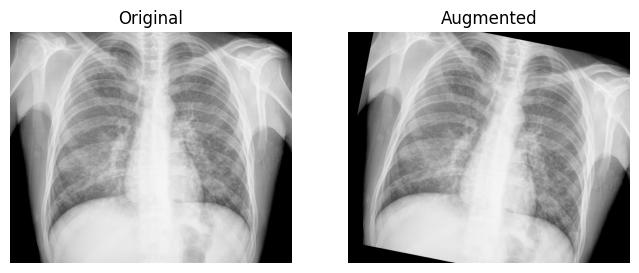

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Load an image from file
img_path = 'D:\\Curated X-Ray Dataset\\COVID-19\\COVID-19 (10).jpg'  # Replace with your image path
img = load_img(img_path)  # Load the image
img_array = img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the expected input shape for the generator

# Create an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    fill_mode='constant'
)

# Create an iterator that will generate batches of augmented images
augmented_images = datagen.flow(img_array, batch_size=1)

# Generate one augmented image
augmented_image = augmented_images.next()[0].astype('uint8')

# Plot the original and augmented images side by side
plt.figure(figsize=(8, 4))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(img_array[0].astype('uint8'))
plt.title("Original")
plt.axis('off')

# Plot the augmented image
ax = plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented")
plt.axis('off')

plt.show()

Found 1 images belonging to 1 classes.


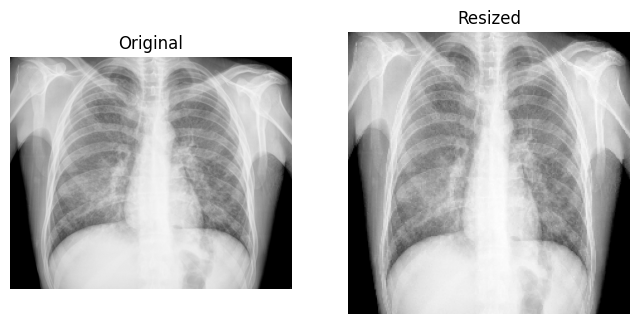

PermissionError: [WinError 5] Access is denied: 'temp_dir'

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import os
from shutil import copyfile, rmtree

# Load an image from file
img_path = 'D:\\Curated X-Ray Dataset\\COVID-19\\COVID-19 (10).jpg'  # Replace with your image path
img = load_img(img_path)  # Load the image
img_array = img_to_array(img)  # Convert the image to a numpy array

# Create an ImageDataGenerator instance
datagen = ImageDataGenerator()

# Create a temporary directory to simulate the flow_from_directory method
temp_dir = 'temp_dir'
os.makedirs(temp_dir, exist_ok=True)
class_dir = os.path.join(temp_dir, 'class1')
os.makedirs(class_dir, exist_ok=True)
temp_img_path = os.path.join(class_dir, 'temp_image.jpg')
copyfile(img_path, temp_img_path)

# Create a generator for the temporary directory
generator = datagen.flow_from_directory(
    temp_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Check if the generator found any images
if generator.samples == 0:
    raise ValueError("No images found in the specified directory. Please check the directory structure and path.")

# Generate the resized image
resized_img_array = next(generator)[0]

# Convert the resized image back to a PIL image for display
resized_img = array_to_img(resized_img_array)

# Plot the original and resized images side by side
plt.figure(figsize=(8, 4))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

# Plot the resized image
ax = plt.subplot(1, 2, 2)
plt.imshow(resized_img)
plt.title("Resized")
plt.axis('off')

plt.show()

# Clean up the temporary directory
rmtree(temp_dir)